In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import sys
import time
import json
import numpy as np
import pandas as pd
import geopandas as gpd
import pickle as pkl
import networkx as nx
import matplotlib.pyplot as plt

from pprint import pprint

import src
from src.reload import deep_reload

This notebook shows how supply sensitive routing works using a randomly generated graph. The core concepts are outlined in the associated paper. In this notebook, a random graph containing places and stations is generated. First a generic example is given where routing is done purely to minimize travel time. Second, a case including vehicle and station parameters is generated and run.

In [215]:
'''
Creating a random graph

graph contains n places and m charging stations - the random graph is completely connected
'''
deep_reload(src)

# Parameters for graph creation
seed = 125396749 # RNG seed [-]
n = 15 # Number of places [-]
m = 85 # Number of stations [-]
speeds = [105 / 3.6] # Set of speeds to be assigned to links [m/s]
chargers = list(range(10)) # Set of numbers of chargers to be assigned to stations [-]
scale = (1e6, 1e6) # Scale of the area on which the graph is generated ([m], [m])

# Setting the graph as directed
kw = {
    'graph': {
        'directed': True,
    },
}

# Creating the graph
graph = src.rng.random_completely_connected_graph(
    n, m, speeds = speeds, scale = scale, seed = seed, chargers = chargers, **kw
)

# # Marking the edge types by source and target type
# graph = src.routing.edge_types(graph)

# adjacency = nx.to_numpy_array(graph, weight = 'time')
# adjacency[adjacency > 2 * 3600] = np.inf

stations_idx = [idx for idx, n in enumerate(graph.nodes) if 'station' in n]

places_idx = [idx for idx, n in enumerate(graph.nodes) if 'place' in n]

for source, adj in graph._adj.items():
    for target, edge in adj.items():

        if edge['distance'] > 200e3:

            edge['distance'] = np.inf
            edge['time'] = np.inf

In [228]:
deep_reload(src)

stations_idx = [idx for idx, n in enumerate(graph.nodes) if 'station' in n]

t0 = time.time()

costs, values, paths = src.floyd_warshall.floyd_warshall(
    graph,
    fields = ['time', 'distance', 'price'],
    pivots = stations_idx,
    origins = places_idx,
    destinations = places_idx,
    tolerance = .01,
)

print(f'Executed in {time.time() - t0:.4f} seconds')

Executed in 0.3704 seconds


In [229]:
values[4]

{0: [{'time': 24841.412309582578,
   'distance': 724541.1923628253,
   'price': 0.0}],
 1: [{'time': 29540.013128635357,
   'distance': 861583.7162518646,
   'price': 0.0}],
 2: [{'time': 33154.60444000853, 'distance': 967009.2961669152, 'price': 0.0},
  {'time': 33082.34898951474, 'distance': 964901.8455275132, 'price': 0.0}],
 3: [{'time': 25008.908849393865,
   'distance': 729426.5081073211,
   'price': 0.0}],
 4: [{'time': 0, 'distance': 0, 'price': 0}],
 5: [{'time': 20393.4829419424, 'distance': 594809.9191399866, 'price': 0.0}],
 6: [{'time': 19424.897445917046,
   'distance': 566559.5088392472,
   'price': 0.0}],
 7: [{'time': 17942.459542813758,
   'distance': 523321.73666540126,
   'price': 0.0}],
 8: [{'time': 21175.851423404198,
   'distance': 617628.9998492891,
   'price': 0.0}],
 9: [{'time': 6652.115584152347, 'distance': 194020.0378711101, 'price': 0.0}],
 10: [{'time': 21460.661806065724,
   'distance': 625935.9693435836,
   'price': 0.0},
  {'time': 21388.406355571933

In [227]:
paths[4]

{0: [[4, 64, 88, 61, 79, 0]],
 1: [[4, 15, 82, 87, 46, 33, 1]],
 2: [[4, 15, 66, 92, 86, 47, 17, 2], [4, 43, 66, 92, 86, 47, 17, 2]],
 3: [[4, 64, 88, 61, 79, 3]],
 4: [[4]],
 5: [[4, 69, 20, 35, 5]],
 6: [[4, 64, 88, 61, 6]],
 7: [[4, 69, 20, 35, 7]],
 8: [[4, 64, 88, 61, 8]],
 9: [[4, 9]],
 10: [[4, 15, 66, 30, 83, 10], [4, 43, 66, 30, 83, 10]],
 11: [[4, 15, 66, 92, 86, 11], [4, 43, 66, 92, 86, 11]],
 12: [[4, 71, 16, 12]],
 13: [[4, 15, 66, 30, 83, 57, 13], [4, 43, 66, 30, 83, 57, 13]],
 14: [[4, 14]]}

In [219]:
deep_reload(src)

stations_idx = [idx for idx, n in enumerate(graph.nodes) if 'station' in n]

t0 = time.time()

costs, values, paths = src.floyd_warshall.floyd_warshall(
    graph,
    fields = ['time', 'distance', 'price'],
    pivots = stations_idx,
    origins = places_idx,
    destinations = places_idx,
)

print(f'Executed in {time.time() - t0:.4f} seconds')

Executed in 0.0146 seconds


In [220]:
values[4]

{0: {'time': 24841.412309582578, 'distance': 724541.1923628253, 'price': 0.0},
 1: {'time': 29540.013128635357, 'distance': 861583.7162518646, 'price': 0.0},
 2: {'time': 33082.34898951474, 'distance': 964901.8455275132, 'price': 0.0},
 3: {'time': 25008.908849393865, 'distance': 729426.5081073211, 'price': 0.0},
 4: {'time': 0, 'distance': 0, 'price': 0},
 5: {'time': 20393.4829419424, 'distance': 594809.9191399866, 'price': 0.0},
 6: {'time': 19424.897445917046, 'distance': 566559.5088392472, 'price': 0.0},
 7: {'time': 17942.459542813758, 'distance': 523321.73666540126, 'price': 0.0},
 8: {'time': 21175.851423404198, 'distance': 617628.9998492891, 'price': 0.0},
 9: {'time': 6652.115584152347, 'distance': 194020.0378711101, 'price': 0.0},
 10: {'time': 21388.406355571933, 'distance': 623828.5187041813, 'price': 0.0},
 11: {'time': 23590.62652384978, 'distance': 688059.9402789518, 'price': 0.0},
 12: {'time': 14298.117249853429, 'distance': 417028.4197873917, 'price': 0.0},
 13: {'ti

In [221]:
paths[4]

{0: [4, 64, 88, 61, 79, 0],
 1: [4, 15, 82, 87, 46, 33, 1],
 2: [4, 43, 66, 92, 86, 47, 17, 2],
 3: [4, 64, 88, 61, 79, 3],
 4: [4],
 5: [4, 69, 20, 35, 5],
 6: [4, 64, 88, 61, 6],
 7: [4, 69, 20, 35, 7],
 8: [4, 64, 88, 61, 8],
 9: [4, 9],
 10: [4, 43, 66, 30, 83, 10],
 11: [4, 43, 66, 92, 86, 11],
 12: [4, 71, 16, 12],
 13: [4, 43, 66, 30, 83, 57, 13],
 14: [4, 14]}

In [198]:
deep_reload(src)

src.floyd_warshall.recover_path_costs(adjacency, paths[0][1])

31742.695203987583

In [191]:
adjacency = nx.to_numpy_array(graph, weight = 'time')

In [39]:
from scipy.sparse.csgraph import floyd_warshall

t0 = time.time()

_, previous = floyd_warshall(adjacency, return_predecessors = True)

print(f'Executed in {time.time() - t0:.4f} seconds')

Executed in 0.2568 seconds


In [43]:
deep_reload(src)

t0 = time.time()

costs, previous = src.floyd_warshall._floyd_warshall(
    adjacency,
    stations_idx,
    np.zeros_like(adjacency),
    np.zeros_like(adjacency, dtype = int),
)

print(f'Executed in {time.time() - t0:.4f} seconds')

Executed in 0.1387 seconds


In [138]:
deep_reload(src)

t0 = time.time()

costs, previous, extended = src.floyd_warshall.floyd_warshall(
    adjacency,
    stations_idx,
)

print(f'Executed in {time.time() - t0:.4f} seconds')

Executed in 0.1636 seconds


In [134]:
deep_reload(src)

n = len(adjacency)

costs = np.zeros_like(adjacency)
predecessors = np.zeros((n, n), dtype = int)
pivots = list(range(0, n, 1))

tolerance = .01
limit = n ** 2

t0 = time.time()

costs, predecessors, store = src.floyd_warshall._floyd_warshall_multi(
    adjacency,
    stations_idx,
    costs,
    predecessors,
    # limit = limit,
    tolerance =  tolerance,
)

print(f'Executed in {time.time() - t0:.4f} seconds', len(store))

Executed in 0.5253 seconds 1462954


In [135]:
deep_reload(src)

extended = src.floyd_warshall.extended_predecessors(
    costs, predecessors, store[-limit:], tolerance = tolerance * 10
)

In [136]:
# origin =  np.random.randint(0, n)
# destination = np.random.randint(0, n)

origin =  places_idx[31]
destination = places_idx[16]

paths = src.floyd_warshall.recover_paths(extended, origin, [[destination]], [])

origin, destination, paths

(31, 16, [[31, 192, 631, 16], [31, 192, 284, 16]])

In [103]:
a = [0, 2, 3, 4]
a.pop(0)
a

[2, 3, 4]

In [94]:
np.array(previous)

array([[ 0, 17, 91, ...,  0, 60, 25],
       [94,  1,  1, ..., 62, 59, 18],
       [94,  2,  2, ..., 62, 95, 48],
       ...,
       [97, 65, 17, ..., 97, 99, 84],
       [94, 17, 91, ..., 84, 98, 98],
       [94, 17, 91, ..., 84, 99, 99]])

In [107]:
deep_reload(src)

adjacency = nx.to_numpy_array(graph, weight = 'time')
adjacency[adjacency > 2 * 3600] = np.inf

m = 5
n = len(adjacency)


costs = list(np.zeros_like(adjacency))
# previous = [[[] for idx in range(n)] for idx in range(n)]
previous = list(np.zeros((n, n), dtype = int))

t0 = time.time()

costs, previous, store = src.floyd_warshall._floyd_warshall_multi(
    list(adjacency),
    costs,
    previous,
)

print(f'Executed in {time.time() - t0:.4f} seconds')

Executed in 0.3827 seconds


In [127]:
deep_reload(src)

origin =  np.random.randint(0, n)
destination = np.random.randint(0, n)

origin, destination, src.floyd_warshall.recover_path(previous, origin, destination)

(76, 64, [76, 90, 16, 71, 64])

In [156]:
opt_pred = {k_0: {k_1: {previous[k_0][k_1]} for k_1 in range(n)} for k_0 in range(n)}

for pred in store:

    s, t, p, c = pred

    if c <= 1.1 * costs[s][t]:

        opt_pred[s][t].add(p)

list(opt_pred[0][1])

[65, 17]

In [179]:
origin, destination

(array([15,  1,  9,  8, 26, 18,  2, 23]),
 array([38,  0, 17, 61, 28, 10, 10,  7]))

In [186]:
deep_reload(src)

n = len(adjacency)

origin =  np.random.randint(0, n)
destination = np.random.randint(0, n)

edges = src.floyd_warshall.recover_tree(opt_pred, origin, [destination], [])

origin, destination, len(edges)

(31, 16, 12)

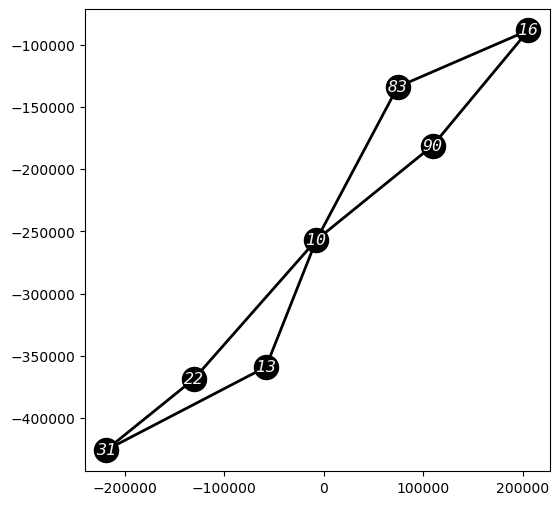

In [187]:
fig, ax = plt.subplots(1, 1, figsize = (6, 6))

tree = nx.DiGraph()
tree.add_edges_from(edges)

names = [k for k in graph.nodes()]

for source, node in tree._node.items():

    data = graph._node[names[source]]

    for key, value in data.items():

        node[key] = value

kw = {
    # 'show_links': False,
    'scatter': {
        's': 300,
        'ec': 'k',
        'fc': 'k',
        'zorder': 4,
    },
    'plot': {
        'lw': 2,
        'color': 'k',
    },
}

src.figures.plot_graph(tree, ax = ax, **kw)

x = [n['x'] for n in tree._node.values()]
y = [n['y'] for n in tree._node.values()]
y = [n['y'] for n in tree._node.values()]
n = [f'{n}' for n in tree.nodes]

kw = {
    'zorder': 5,
    'horizontalalignment': 'center',
    'verticalalignment': 'center',
    'fontstyle': 'italic',
    'fontsize': 'large',
    'fontfamily': 'monospace',
    'color': 'whitesmoke',
}

for idx in range(len(n)):
    
    ax.text(x[idx], y[idx], n[idx], **kw)

In [197]:
deep_reload(src)

n = len(adjacency)

# origin =  np.random.randint(0, n)
# destination = np.random.randint(0, n)

origin =  31
destination = 16

paths = src.floyd_warshall.recover_paths(opt_pred, origin, [[destination]], [])

origin, destination, paths

(31,
 16,
 [[31, 22, 10, 83, 16],
  [31, 13, 10, 83, 16],
  [31, 22, 10, 90, 16],
  [31, 13, 10, 90, 16]])

In [189]:
tree._adj[16]

{}

In [191]:
a = {'a': 1, 'b': 2}
a.pop()

TypeError: pop expected at least 1 argument, got 0

In [193]:
a = [1, 2, 3]

b = [4] + a

b[2] = 7

a, b

([1, 2, 3], [4, 1, 7, 3])

In [145]:
len(tree._adj[3])

78

In [ ]:
deep_reload(src)

origin =  np.random.randint(0, n)
destination = np.random.randint(0, n)

tree = []

src.floyd_warshall.recover_tree(opt_pred, origin, destination, tree)

In [137]:
a = {}
# a.pop(), a

0

In [80]:
from scipy.sparse.csgraph import floyd_warshall

_, previous = floyd_warshall(adjacency, return_predecessors = True)

In [81]:
previous

array([[-9999,    17,    91, ...,     0,    60,    25],
       [   94, -9999,     1, ...,    62,    59,    18],
       [   94,     2, -9999, ...,    62,    95,    48],
       ...,
       [   97,    65,    17, ..., -9999,    99,    84],
       [   94,    17,    91, ...,    84, -9999,    98],
       [   94,    17,    91, ...,    84,    99, -9999]], dtype=int32)

In [69]:
u = 0
v = 550

path = [v]

k = 0
while u != v:
    
    k += 1
    if k > 100:
        break
    
    v = previous[u][v]
    path.append(v)

path   

[550, 91, 264, 625, 146, 180, 0]

In [52]:
graph.is_directed()

True

In [59]:
'''
Running with Bellman with default objective

This cell uses a simple objective function which minimizes travel time but limits
the travel time of edge which can be traversed forcing indirect routes in some cases.
This is a fairly limiting cost function which, more or less mimics the NetworkX
implementation.
'''
deep_reload(src)

# Selecting the origin - this must be an iterable. Multiple origins can be selected.
origins = [k for k in graph.nodes if 'place' in k]
pivots = [k for k in graph.nodes if 'place' not in k]
# origins = ['place_0']

# Defining the cost function
objective = src.floyd_warshall.Objective(field = 'time', edge_limit = 3600 * 2)

t0 = time.time()

# Running the optimization
costs, values, paths = src.floyd_warshall.floyd_warshall(
    graph, origins,
    pivots = pivots,
    objective = objective,
    return_paths = True,
)

print(f'Executed in {time.time() - t0:.4f} seconds')

Executed in 0.8562 seconds


In [62]:
costs['place_1']

{'place_0': 32973.00116660798,
 'place_1': 0.0,
 'place_2': 4682.781122601585,
 'place_3': 33600.24587843644,
 'place_4': 27843.99826641951,
 'place_5': 19185.581178251567,
 'place_6': 31816.150408820453,
 'place_7': 17074.77383852056,
 'place_8': 32319.29213570632,
 'place_9': 34161.58203722548,
 'place_10': 15808.378506572184,
 'place_11': 11407.949624792023,
 'place_12': 22789.68032854288,
 'place_13': 15457.268914873042,
 'place_14': 32522.701499528095,
 'station_0': 25728.477930775072,
 'station_1': 22814.099129779446,
 'station_2': 5243.556605726273,
 'station_3': 11778.093297700783,
 'station_4': 5099.977314052751,
 'station_5': 20711.40161184728,
 'station_6': 29778.138931252724,
 'station_7': 13493.36601860723,
 'station_8': 16196.82621885345,
 'station_9': 31596.59013230054,
 'station_10': 22928.27693932585,
 'station_11': 21336.452331920278,
 'station_12': 21816.19345287699,
 'station_13': 22160.049005360946,
 'station_14': 30591.585146385332,
 'station_15': 20026.2150560115

In [61]:
previous = paths

u = 'place_0'
v = 'place_1'

path = [v]

k = 0
while u != v:
    
    k += 1
    if k > 100:
        break
    
    v = previous[u][v]
    path.append(v)

path   

['place_1',
 'station_2',
 'station_3',
 'station_84',
 'station_10',
 'station_79',
 'place_0']